In [52]:
# # Check Pytorch installation
# import torch, torchvision
# print('torch version:', torch.__version__, torch.cuda.is_available())
# print('torchvision version:', torchvision.__version__)

# # Check MMPose installation
# import mmpose
# print('mmpose version:', mmpose.__version__)

# # Check mmcv installation
# from mmcv.ops import get_compiling_cuda_version, get_compiler_version
# print('cuda version:', get_compiling_cuda_version())
# print('compiler information:', get_compiler_version())

In [1]:
import cv2
from mmpose.apis import (inference_top_down_pose_model, init_pose_model,
                         vis_pose_result)

pose_config = 'configs/body/2d_kpt_sview_rgb_img/topdown_heatmap/coco/ViTPose_huge_coco_256x192.py'
pose_checkpoint = '/datadrive/ViTPose/pretrained/vitpose-h-multi-coco.pth'

# initialize pose model
pose_model = init_pose_model(pose_config, pose_checkpoint)


/home/ztchen/.local/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


apex is not installed
apex is not installed
apex is not installed
Use load_from_local loader


In [5]:

game_id = '22_,'
# extract person (COCO_ID=1) bounding boxes from the detection results
annot_file = f'./nba-preprocessing/output/{game_id}/{game_id}_tracking.txt'
bboxes_by_frame = {}
with open(annot_file) as f:
    lines = f.readlines()
    for line in lines:
        frame_id, tid, x, y, w, h, score, _, _, _= line.split(',')
        if frame_id not in bboxes_by_frame:
            bboxes_by_frame[frame_id] = []
        bboxes_by_frame[frame_id].append(({
          'track_id': int(tid), 
          'bbox': (float(x), float(y), float(w), float(h))
          }))

In [7]:
frame_id = '0'
img = cv2.imread(f'./nba-preprocessing/images/{game_id}/{frame_id}.jpg')
bboxes = bboxes_by_frame[frame_id]

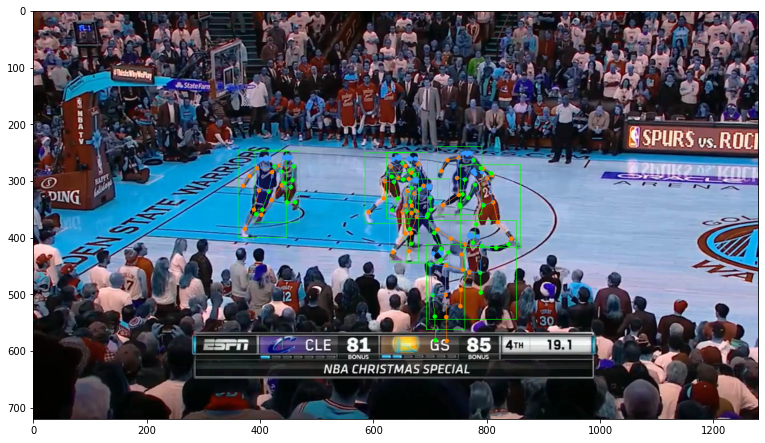

In [31]:
import matplotlib.pyplot as plt

# inference pose
pose_results, returned_outputs = inference_top_down_pose_model(pose_model,
                                                               img,
                                                               bboxes,
                                                            #    bbox_thr=0.3,
                                                               format='xywh',
                                                               dataset=pose_model.cfg.data.test.type)

# show pose estimation results
vis_result = vis_pose_result(pose_model,
                             img,
                             pose_results,
                             dataset=pose_model.cfg.data.test.type,
                             show=False)
# reduce image size
vis_result = cv2.resize(vis_result, dsize=None, fx=0.5, fy=0.5)

plt.figure(figsize=(13, 8))
plt.imshow(vis_result)

In [51]:
import json

keypoint_info = pose_model.cfg.data.test.dataset_info.keypoint_info

data = []
for pose in pose_results:
    keypoints = [(keypoint_info[kId]['name'], float(x), float(y), float(s)) for kId, (x, y, s) in enumerate(pose['keypoints'])]
    t, l, b, r = pose['bbox']
    bbox = list(map(float, [t, l, b - t, r - l]))
    # print(bbox, keypoints)
    data.append({'track_id': pose['track_id'], 'keypoints': keypoints, 'bbox': bbox})
json.dumps(data)


[{'track_id': 0, 'keypoints': [('nose', 411.9815979003906, 263.7962646484375, 0.972151517868042), ('left_eye', 413.7496643066406, 260.3992919921875, 0.9573041200637817), ('right_eye', 408.6714172363281, 261.1625061035156, 0.9919571876525879), ('left_ear', 416.09478759765625, 260.5174560546875, 0.9462258815765381), ('right_ear', 402.8448181152344, 262.4322204589844, 0.9424009323120117), ('left_shoulder', 425.46038818359375, 275.70849609375, 0.9251476526260376), ('right_shoulder', 395.2078857421875, 278.0276184082031, 0.8890398740768433), ('left_elbow', 437.6960144042969, 284.8349304199219, 0.9090704917907715), ('right_elbow', 381.02520751953125, 292.6668395996094, 0.916347324848175), ('left_wrist', 440.2872619628906, 305.7884216308594, 0.8750518560409546), ('right_wrist', 370.730712890625, 309.6598205566406, 0.8966273069381714), ('left_hip', 415.5738220214844, 319.43096923828125, 0.8787087798118591), ('right_hip', 398.5793762207031, 317.03131103515625, 0.8313650488853455), ('left_knee',

'[{"track_id": 0, "keypoints": [["nose", 411.9815979003906, 263.7962646484375, 0.972151517868042], ["left_eye", 413.7496643066406, 260.3992919921875, 0.9573041200637817], ["right_eye", 408.6714172363281, 261.1625061035156, 0.9919571876525879], ["left_ear", 416.09478759765625, 260.5174560546875, 0.9462258815765381], ["right_ear", 402.8448181152344, 262.4322204589844, 0.9424009323120117], ["left_shoulder", 425.46038818359375, 275.70849609375, 0.9251476526260376], ["right_shoulder", 395.2078857421875, 278.0276184082031, 0.8890398740768433], ["left_elbow", 437.6960144042969, 284.8349304199219, 0.9090704917907715], ["right_elbow", 381.02520751953125, 292.6668395996094, 0.916347324848175], ["left_wrist", 440.2872619628906, 305.7884216308594, 0.8750518560409546], ["right_wrist", 370.730712890625, 309.6598205566406, 0.8966273069381714], ["left_hip", 415.5738220214844, 319.43096923828125, 0.8787087798118591], ["right_hip", 398.5793762207031, 317.03131103515625, 0.8313650488853455], ["left_knee"